In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [2]:
filepath = "./data/final_fcd.csv"
data2 = pd.read_csv(filepath, sep=",", names=["vehicle_fuel", "vehicle_speed", "vehicle_noise", "vehicle_NOx", "prediction"])
data2.head(10)

vehicle_fuel  vehicle_speed  vehicle_noise  vehicle_NOx  prediction
0          0.00           8.90          70.94         0.00    6.770355
1          0.00           8.90          70.94         0.00    6.770355
2       2321.67           0.00          67.11        84.89   57.398065
3       2321.67           0.00          67.11        84.89   57.398065
4       2321.67           0.00          67.11        84.89   57.398065
5       2321.67           0.00          67.11        84.89   57.398065
6       8309.50           8.85          76.30       223.29  196.345229
7       8309.50           8.85          76.30       223.29  196.345229
8      11945.92          12.50          79.21       309.36  224.415676
9      11945.92          12.50          79.21       309.36  224.415676

In [3]:
filepath = "./data/final_emissions.csv"
data1 = pd.read_csv(filepath, sep=",", names=["vehicle_x", "vehicle_y", "congestion_cluster"])
data1

vehicle_x  vehicle_y  congestion_cluster
0       3835.68    1563.00                   1
1       3835.68    1563.00                   1
2       6552.12    2463.59                   4
3       6552.12    2463.59                   4
4       1714.28    2203.29                   3
...         ...        ...                 ...
2741    5973.83    1142.47                   2
2742    4053.45    2179.57                   0
2743    4053.45    2179.57                   0
2744    4386.68    1805.91                   0
2745    4386.68    1805.91                   0

[2746 rows x 3 columns]

In [5]:

# x1 = 0.26
# y1 = 14.01
# lat1 = 59.321926
# lon1 = 18.067417

# x2 = 116.30
# y2 = 109.42
# lat2 = 59.322828
# lon2 = 18.069380

# vehicle_x = data1["vehicle_x"]  
# vehicle_y = data1["vehicle_y"] 

# scale_factor_x = (lon2 - lon1) / (x2 - x1)
# scale_factor_y = (lat2 - lat1) / (y2 - y1)

# data1["lat"] = lat1 + (vehicle_y - y1) * scale_factor_y
# data1["lon"] = lon1 + (vehicle_x - x1) * scale_factor_x


x1, y1 = 1897.19, 2887.64
lat1, lon1 = 52.529167, 13.379135
x2, y2 = 3352.04, 2576.87
lat2, lon2 = 52.526666, 13.400674

def calculate_coefficients(x1, y1, lat1, lon1, x2, y2, lat2, lon2):
    a_lat = (lat2 - lat1) / (x2 - x1)
    b_lat = (lat2 - lat1) / (y2 - y1)
    
    a_lon = (lon2 - lon1) / (x2 - x1)
    b_lon = (lon2 - lon1) / (y2 - y1)
    
    return a_lat, b_lat, a_lon, b_lon

a_lat, b_lat, a_lon, b_lon = calculate_coefficients(x1, y1, lat1, lon1, x2, y2, lat2, lon2)

def xy_to_latlon(x, y, x1, y1, lat1, lon1, a_lat, b_lat, a_lon, b_lon):
    lat = lat1 + a_lat * (x - x1) + b_lat * (y - y1)
    lon = lon1 + a_lon * (x - x1) + b_lon * (y - y1)
    return lat, lon

vehicle_x = data1["vehicle_x"]  
vehicle_y = data1["vehicle_y"] 

lat, lon = xy_to_latlon(vehicle_x, vehicle_y, x1, y1, lat1, lon1, a_lat, b_lat, a_lon, b_lon)

data1["lat"] = lat
data1["lon"] = lon


print(data1)

      vehicle_x  vehicle_y  congestion_cluster        lat        lon
0       3835.68    1563.00                   1  52.515174  13.499643
1       3835.68    1563.00                   1  52.515174  13.499643
2       6552.12    2463.59                   4  52.517752  13.477441
3       6552.12    2463.59                   4  52.517752  13.477441
4       1714.28    2203.29                   3  52.523974  13.423858
...         ...        ...                 ...        ...        ...
2741    5973.83    1142.47                   2  52.508114  13.560445
2742    4053.45    2179.57                   0  52.519762  13.460134
2743    4053.45    2179.57                   0  52.519762  13.460134
2744    4386.68    1805.91                   0  52.516182  13.490965
2745    4386.68    1805.91                   0  52.516182  13.490965

[2746 rows x 5 columns]


In [6]:
data1 = gpd.GeoDataFrame(data1, geometry=gpd.points_from_xy(data1["lat"], data1["lon"]))
data1.head(10)

vehicle_x  vehicle_y  congestion_cluster        lat        lon  \
0    3835.68    1563.00                   1  52.515174  13.499643   
1    3835.68    1563.00                   1  52.515174  13.499643   
2    6552.12    2463.59                   4  52.517752  13.477441   
3    6552.12    2463.59                   4  52.517752  13.477441   
4    1714.28    2203.29                   3  52.523974  13.423858   
5    1714.28    2203.29                   3  52.523974  13.423858   
6    5586.86    1558.87                   2  52.512131  13.525855   
7    5586.86    1558.87                   2  52.512131  13.525855   
8    1122.96    2623.78                   3  52.528374  13.385960   
9    1122.96    2623.78                   3  52.528374  13.385960   

                    geometry  
0  POINT (52.51517 13.49964)  
1  POINT (52.51517 13.49964)  
2  POINT (52.51775 13.47744)  
3  POINT (52.51775 13.47744)  
4  POINT (52.52397 13.42386)  
5  POINT (52.52397 13.42386)  
6  POINT (52.51213 13.52586)  
7  POINT (52.51213 13.52586)  
8  POINT (52.52837 13.38596)  
9  POINT (52.52837 13.38596)

In [7]:
clusters = data1["congestion_cluster"].unique()
clusters

array([1, 4, 3, 2, 0])

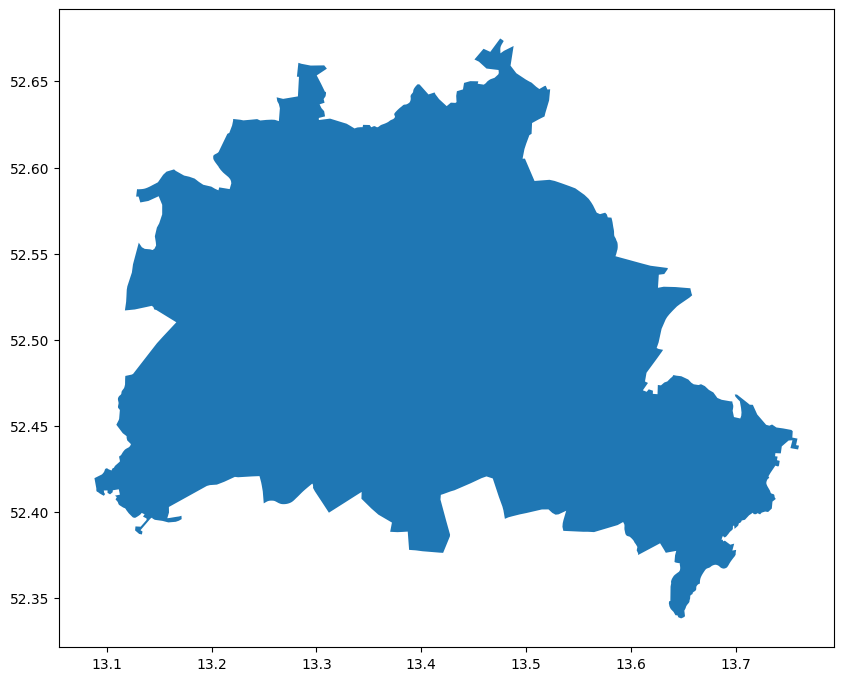

In [8]:
# world = gpd.read_file('./stockholm.geojson')
world = gpd.read_file('./Berlin.geojson')

world.head(10)
world.plot(figsize=(10, 10))
plt.show()

In [9]:


m = folium.Map(location=[52.553677,	14.282566], zoom_start=12)

color_map = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple'
}

marker_cluster = MarkerCluster().add_to(m)

for index, row in data1.iterrows():
    folium.Marker(location=[row["lat"], row["lon"]], popup="Cluster", 
                  icon=folium.Icon(color=color_map.get(row["congestion_cluster"], 'gray'))).add_to(marker_cluster)

m
